The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

    Id
    SepalLengthCm
    SepalWidthCm
    PetalLengthCm
    PetalWidthCm
    Species


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
import plotly.graph_objs as go
import chart_studio.plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

Clearly from the info data above there are no missing values

In [12]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [19]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [21]:
df.skew()

Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [22]:
df.kurt()

Id              -1.200000
SepalLengthCm   -0.552064
SepalWidthCm     0.290781
PetalLengthCm   -1.401921
PetalWidthCm    -1.339754
dtype: float64

In [23]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [24]:
df = df.drop(columns=['Id'])

In [28]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


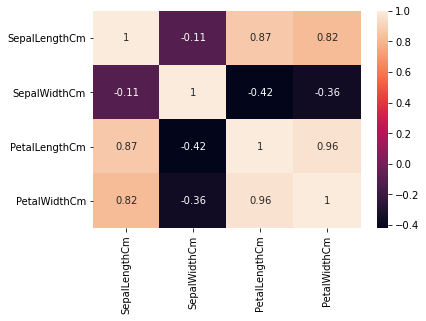

In [30]:
sns.heatmap(df.corr(), annot=True)

So from all the above descriptive analysis, we can notice the following:
    1. petallength and sepallength are correlated
    2. petallength and petal width are correlated.
    

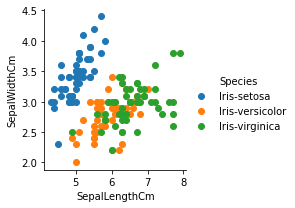

In [37]:
sns.FacetGrid(df, hue="Species").map(plt.scatter, "SepalLengthCm","SepalWidthCm").add_legend()

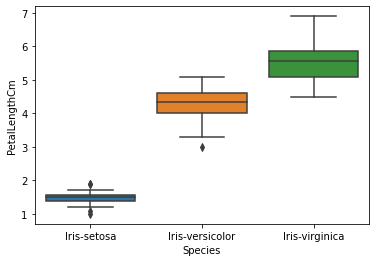

In [44]:
sns.boxplot(x="Species", y="PetalLengthCm", data=df)

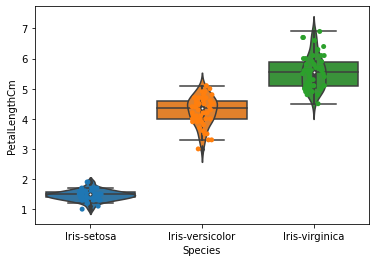

In [50]:
ax=sns.stripplot(x="Species", y="PetalLengthCm", data=df, jitter=True, edgecolor="gray")
ax=sns.boxplot(x="Species", y="PetalLengthCm", data=df)


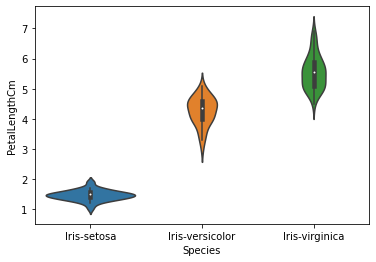

In [51]:
ax=sns.violinplot(x="Species", y="PetalLengthCm", data=df, size=6)

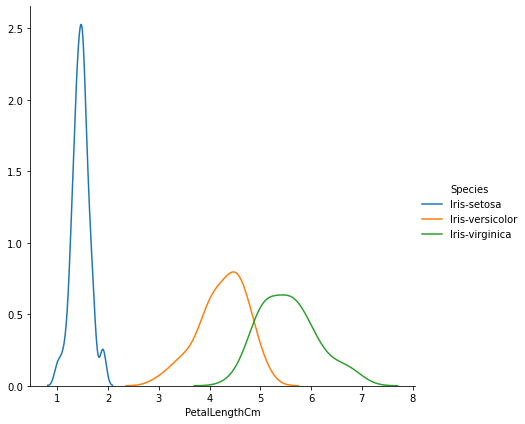

In [54]:
sns.FacetGrid(df, hue="Species", height=6).map(sns.kdeplot, "PetalLengthCm").add_legend()

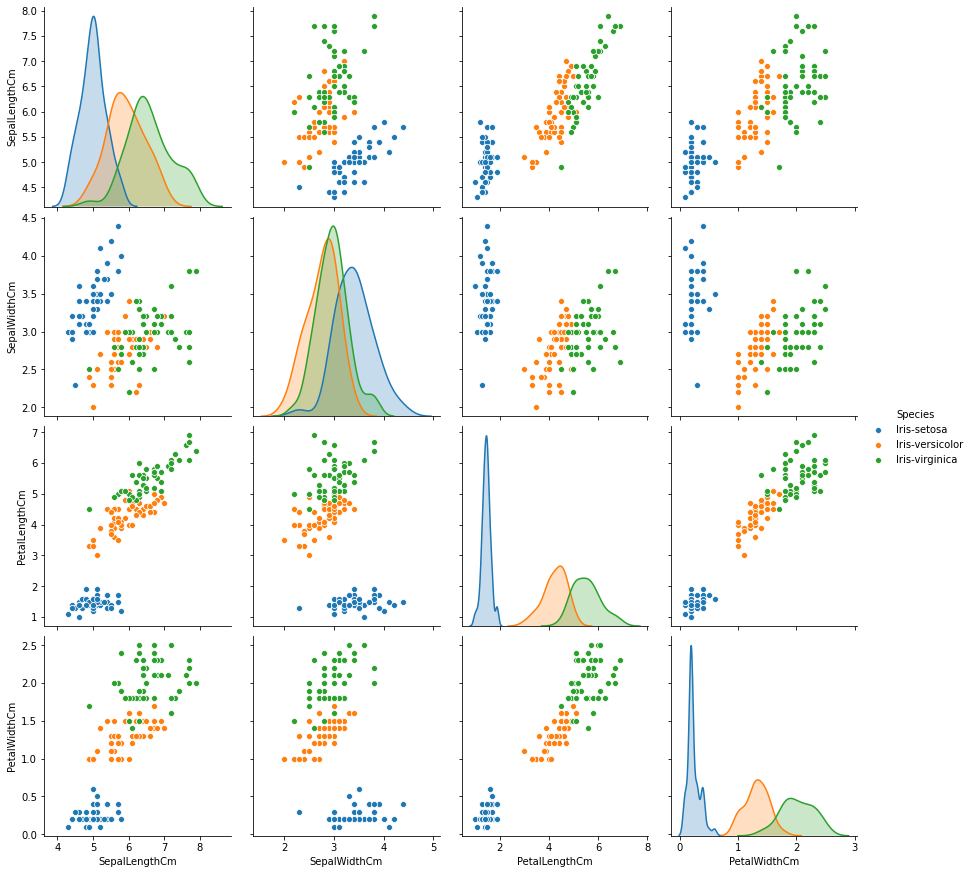

In [58]:
sns.pairplot(df, hue="Species", height=3)

From the pairplot, we see that petallength and petal width are better classifiers of species as we can visually clearly see the clusters seperately

Before we design the ML models, we need to encode the categorical target and then we will need to shuffle the data and then feed to ML model

In [62]:
df['target'] = df['Species'].apply(lambda x : 0 if x=='Iris-setosa' else 1 if x=='Iris-versicolor' else 2 )

In [66]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


We will split data into X and y.
We will use stratify parameter when splitting data

In [69]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [70]:
y=df['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.10, random_state=0, shuffle=True)

In [89]:
X_train.shape

(135, 4)

In [81]:
X_test.shape

(15, 4)

In [82]:
Y_train.shape

(135,)

In [83]:
Y_test.shape

(15,)

In [77]:
from sklearn.linear_model import LogisticRegression

In [92]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_test)

In [85]:
from sklearn.metrics import classification_report, accuracy_score

In [93]:

print(accuracy_score(predictions, Y_test))

1.0


In [94]:
print(classification_report(predictions, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)
predictions = DT.predict(X_test)
print(accuracy_score(predictions, Y_test))

1.0


In [97]:
print(classification_report(predictions, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

